<a href="https://colab.research.google.com/github/VBernasconi/TowardsDVS/blob/main/OpenPose_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) and was freely adapted from https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/OpenPose.ipynb for further information on the original notebook, see [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install OpenPose
Run the next cell to install openpose. The whole process takes a few minutes

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
#from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

## Install libraries and create folders

In [25]:
from google.colab import files
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!cd openpose && mkdir input_img
!cd openpose && mkdir output_img

mkdir: cannot create directory ‘input_img’: File exists
mkdir: cannot create directory ‘output_img’: File exists


## Upload images
The next cell allows you to browse through your local directory to upload images

In [19]:
uploaded = files.upload()

Saving giotto_ascension.jpg to giotto_ascension.jpg


In [20]:
filenames = uploaded.keys()
for file in filenames:
  !mv $file openpose/input_img/

## Run OpenPose
The next cell runs OpenPose on the images that you uploaded to the *input_img/* folder (see previous cell). The results are then stored in *output_img/* folder

In [21]:
!cd openpose && ./build/examples/openpose/openpose.bin --display 0 --image_dir input_img --face --hand --write_images output_img/

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 13.264130 seconds.


## See results

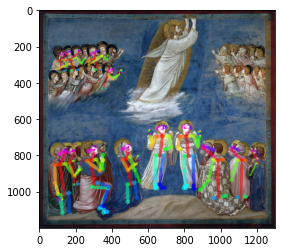

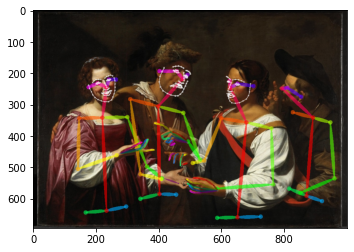

In [28]:
for filename in os.listdir('openpose/output_img'):
  img = mpimg.imread('openpose/output_img/'+filename)
  plt.figure()
  plt.imshow(img)

## Download results
Run next cell to download the results from the openpose model. It will first compress the folder to a zip file and then be downloaded to one of your local folder.

In [22]:
!cd openpose && zip -r output_img.zip output_img
files.download('openpose/output_img.zip')

updating: output_img/ (stored 0%)
updating: output_img/diseuse_bonne_aventure_VOUET_rendered.png (deflated 0%)
  adding: output_img/giotto_ascension_rendered.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>